In [1]:
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# read in all our data
pt_treatment = pd.read_csv("Datasets/Treatment_Follow_Up.csv", low_memory=False)


In [2]:
pt_treatment.head()

,case_id,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,task_to_perform,treat_for_diarrhea,treat_for_malaria,...,child_taking_ors,ors_not_given,how_disease_progressing,new_danger_sign,close_out,why_close_out,when_child_died,where_child_died,follow_up_count,follow_up_type
0,00159146-3099-3ECF-9218-DAF176D00A12,1,2D09AC5E-6A1D-02C9-844A-7A3CCC59B236,db91e797f2ce030419456e90ab7914d5,8bc01540-57c3-4cea-9b7d-c4922098a59c,356559E4-BA74-411C-BFF4-AC4DF047AEBF,2017-09-16 19:10:38+00,follow_up,False,False,...,NaN,NaN,improved,no,False,NaN,NaN,NaN,4,ari
1,001F9F88-1793-3401-84D8-E34D25A43002,1,86D3B6D7-3584-0929-9930-263185102CE3,e4fe5803-e31a-4304-ab1f-e66b653d5ed0,59b20b90-3fdd-4c12-8fe4-8fcbe15389b9,5afdce0e-1937-4b46-bbd5-89f861752dab,2017-06-01 09:47:26+00,follow_up,False,True,...,NaN,NaN,cured,no,False,NaN,NaN,NaN,1,malaria
2,001F9F88-1793-3401-84D8-E34D25A43002,2,D781E302-EBCC-83F5-AE76-C91E6CD7E9FF,e4fe5803-e31a-4304-ab1f-e66b653d5ed0,59b20b90-3fdd-4c12-8fe4-8fcbe15389b9,5afdce0e-1937-4b46-bbd5-89f861752dab,2017-06-02 13:57:10+00,follow_up,False,True,...,NaN,NaN,improved,no,False,NaN,NaN,NaN,2,malaria
3,001F9F88-1793-3401-84D8-E34D25A43002,3,9EA28B2C-9776-AC04-A77C-A9CD8DC504A3,e4fe5803-e31a-4304-ab1f-e66b653d5ed0,59b20b90-3fdd-4c12-8fe4-8fcbe15389b9,5afdce0e-1937-4b46-bbd5-89f861752dab,2017-06-03 10:39:17+00,follow_up,False,True,...,NaN,NaN,improved,no,False,NaN,NaN,NaN,3,malaria
4,00249697-479E-93E4-AFFE-47F095816F20,1,E40A5130-2FAB-508C-B6A0-7BD4DA08321B,a742fff1-7ba4-43bb-9ab1-ec602781f6c9,9bd0afe1-19aa-4431-92f2-05e70d4c8e2f,97410838-dc38-4fde-a48c-57d901dcfdca,2017-03-04 13:47:21+00,follow_up,False,True,...,NaN,NaN,cured,no,False,NaN,NaN,NaN,2,malaria


In [3]:
pt_treatment.count()

case_id                     23561
event_number                23561
event_id                    23561
chw_id                      23561
chw_parent_id               23561
patient_id                  23561
reported                    23561
task_to_perform             23561
treat_for_diarrhea          23561
treat_for_malaria           23561
treat_for_ari               23561
under_observation               0
child_temperature           23556
child_temperature_retake      374
respiration_rate            16046
child_taking_act             3882
child_morning_act            3828
child_evening_act            3828
act_not_given                  54
child_taking_amox           15653
amox_not_given                149
child_taking_zinc             129
zinc_not_given                  3
child_taking_ors              129
ors_not_given                   5
how_disease_progressing     22919
new_danger_sign             22691
close_out                   23561
why_close_out                 642
when_child_die

In [4]:
pt_treatment.describe()

,event_number,under_observation,child_temperature,child_temperature_retake,respiration_rate,follow_up_count
count,23561.000000,0.0,23556.000000,374.000000,16046.000000,23561.000000
mean,1.671618,NaN,36.845505,37.199198,40.546429,2.025678
std,0.900394,NaN,1.109462,6.937277,10.018726,1.127625
min,1.000000,NaN,0.500000,0.000000,0.000000,1.000000
25%,1.000000,NaN,36.500000,35.000000,37.000000,1.000000
50%,1.000000,NaN,36.900000,36.000000,40.000000,2.000000
75%,2.000000,NaN,37.200000,37.000000,45.000000,3.000000
max,4.000000,NaN,50.500000,50.000000,635.000000,4.000000


In [5]:
max(pt_treatment['follow_up_count'])

4

In [6]:
pt_treatment.iloc[1:3, :]

,case_id,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,task_to_perform,treat_for_diarrhea,treat_for_malaria,...,child_taking_ors,ors_not_given,how_disease_progressing,new_danger_sign,close_out,why_close_out,when_child_died,where_child_died,follow_up_count,follow_up_type
1,001F9F88-1793-3401-84D8-E34D25A43002,1,86D3B6D7-3584-0929-9930-263185102CE3,e4fe5803-e31a-4304-ab1f-e66b653d5ed0,59b20b90-3fdd-4c12-8fe4-8fcbe15389b9,5afdce0e-1937-4b46-bbd5-89f861752dab,2017-06-01 09:47:26+00,follow_up,False,True,...,NaN,NaN,cured,no,False,NaN,NaN,NaN,1,malaria
2,001F9F88-1793-3401-84D8-E34D25A43002,2,D781E302-EBCC-83F5-AE76-C91E6CD7E9FF,e4fe5803-e31a-4304-ab1f-e66b653d5ed0,59b20b90-3fdd-4c12-8fe4-8fcbe15389b9,5afdce0e-1937-4b46-bbd5-89f861752dab,2017-06-02 13:57:10+00,follow_up,False,True,...,NaN,NaN,improved,no,False,NaN,NaN,NaN,2,malaria


In [7]:
pt_treatment.groupby('task_to_perform').count()

,case_id,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,treat_for_diarrhea,treat_for_malaria,treat_for_ari,...,child_taking_ors,ors_not_given,how_disease_progressing,new_danger_sign,close_out,why_close_out,when_child_died,where_child_died,follow_up_count,follow_up_type
task_to_perform,,,,,,,,,,,,,,,,,,,,,
close_out,642,642,642,642,642,642,642,642,642,642,...,0,0,0,0,642,642,2,2,642,642
follow_up,22919,22919,22919,22919,22919,22919,22919,22919,22919,22919,...,129,5,22919,22691,22919,0,0,0,22919,22919


In [8]:
# number of patients with malaria
len(pt_treatment[pt_treatment['treat_for_malaria'] == True])

4226

In [9]:
# number of patients with malaria, diarrhea or ari
len(pt_treatment[(pt_treatment['treat_for_malaria'] == True) | (pt_treatment['treat_for_diarrhea'] == True) | (pt_treatment['treat_for_ari'] == True)])

23561

In [10]:
pt_treatment.groupby('how_disease_progressing').count()

,case_id,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,task_to_perform,treat_for_diarrhea,treat_for_malaria,...,zinc_not_given,child_taking_ors,ors_not_given,new_danger_sign,close_out,why_close_out,when_child_died,where_child_died,follow_up_count,follow_up_type
how_disease_progressing,,,,,,,,,,,,,,,,,,,,,
aggravated,85,85,85,85,85,85,85,85,85,85,...,0,1,0,0,85,0,0,0,85,85
cured,7730,7730,7730,7730,7730,7730,7730,7730,7730,7730,...,1,60,2,7730,7730,0,0,0,7730,7730
improved,14898,14898,14898,14898,14898,14898,14898,14898,14898,14898,...,1,62,2,14898,14898,0,0,0,14898,14898
no_change,206,206,206,206,206,206,206,206,206,206,...,1,6,1,63,206,0,0,0,206,206


In [11]:
tmt = pt_treatment[pt_treatment['close_out']==False]
tmt.groupby('how_disease_progressing').count()

,case_id,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,task_to_perform,treat_for_diarrhea,treat_for_malaria,...,zinc_not_given,child_taking_ors,ors_not_given,new_danger_sign,close_out,why_close_out,when_child_died,where_child_died,follow_up_count,follow_up_type
how_disease_progressing,,,,,,,,,,,,,,,,,,,,,
aggravated,46,46,46,46,46,46,46,46,46,46,...,0,0,0,0,46,0,0,0,46,46
cured,7458,7458,7458,7458,7458,7458,7458,7458,7458,7458,...,0,49,2,7458,7458,0,0,0,7458,7458
improved,14423,14423,14423,14423,14423,14423,14423,14423,14423,14423,...,1,56,2,14423,14423,0,0,0,14423,14423
no_change,131,131,131,131,131,131,131,131,131,131,...,1,2,1,58,131,0,0,0,131,131


In [12]:
tmt.head()

,case_id,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,task_to_perform,treat_for_diarrhea,treat_for_malaria,...,child_taking_ors,ors_not_given,how_disease_progressing,new_danger_sign,close_out,why_close_out,when_child_died,where_child_died,follow_up_count,follow_up_type
0,00159146-3099-3ECF-9218-DAF176D00A12,1,2D09AC5E-6A1D-02C9-844A-7A3CCC59B236,db91e797f2ce030419456e90ab7914d5,8bc01540-57c3-4cea-9b7d-c4922098a59c,356559E4-BA74-411C-BFF4-AC4DF047AEBF,2017-09-16 19:10:38+00,follow_up,False,False,...,NaN,NaN,improved,no,False,NaN,NaN,NaN,4,ari
1,001F9F88-1793-3401-84D8-E34D25A43002,1,86D3B6D7-3584-0929-9930-263185102CE3,e4fe5803-e31a-4304-ab1f-e66b653d5ed0,59b20b90-3fdd-4c12-8fe4-8fcbe15389b9,5afdce0e-1937-4b46-bbd5-89f861752dab,2017-06-01 09:47:26+00,follow_up,False,True,...,NaN,NaN,cured,no,False,NaN,NaN,NaN,1,malaria
2,001F9F88-1793-3401-84D8-E34D25A43002,2,D781E302-EBCC-83F5-AE76-C91E6CD7E9FF,e4fe5803-e31a-4304-ab1f-e66b653d5ed0,59b20b90-3fdd-4c12-8fe4-8fcbe15389b9,5afdce0e-1937-4b46-bbd5-89f861752dab,2017-06-02 13:57:10+00,follow_up,False,True,...,NaN,NaN,improved,no,False,NaN,NaN,NaN,2,malaria
3,001F9F88-1793-3401-84D8-E34D25A43002,3,9EA28B2C-9776-AC04-A77C-A9CD8DC504A3,e4fe5803-e31a-4304-ab1f-e66b653d5ed0,59b20b90-3fdd-4c12-8fe4-8fcbe15389b9,5afdce0e-1937-4b46-bbd5-89f861752dab,2017-06-03 10:39:17+00,follow_up,False,True,...,NaN,NaN,improved,no,False,NaN,NaN,NaN,3,malaria
4,00249697-479E-93E4-AFFE-47F095816F20,1,E40A5130-2FAB-508C-B6A0-7BD4DA08321B,a742fff1-7ba4-43bb-9ab1-ec602781f6c9,9bd0afe1-19aa-4431-92f2-05e70d4c8e2f,97410838-dc38-4fde-a48c-57d901dcfdca,2017-03-04 13:47:21+00,follow_up,False,True,...,NaN,NaN,cured,no,False,NaN,NaN,NaN,2,malaria


In [13]:
tmt[tmt['how_disease_progressing'] == 'aggravated'].groupby('patient_id').head()

,case_id,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,task_to_perform,treat_for_diarrhea,treat_for_malaria,...,child_taking_ors,ors_not_given,how_disease_progressing,new_danger_sign,close_out,why_close_out,when_child_died,where_child_died,follow_up_count,follow_up_type
546,05D06A0A-FDE0-51F1-BDAA-38E5E1A29175,1,249B733C-7B7D-C690-9FB7-0AE2B57E3584,a742fff1-7ba4-43bb-9ab1-ec602781f6c9,9bd0afe1-19aa-4431-92f2-05e70d4c8e2f,a36b00d3-eef5-4658-91be-2ab62ca773f0,2017-04-04 19:55:44+00,follow_up,True,False,...,NaN,NaN,aggravated,NaN,False,NaN,NaN,NaN,1,referral
1904,147CBB4F-3F65-8A0D-8A8E-4119283193FD,2,E304B0A2-1D89-F170-8A08-A659169A9F98,840b2728-463b-4ff0-983e-f0d24af1d87e,958c8ea7-4d9f-454b-ae91-060829f56b61,0ccaf458-bb6b-40c6-bc7c-0129ead94fe9,2017-02-08 10:03:03+00,follow_up,False,True,...,NaN,NaN,aggravated,NaN,False,NaN,NaN,NaN,2,referral
2266,183C90BD-0DAC-DAC1-B44D-F667FAEA9553,1,FD7674E1-677C-2B73-A3E7-2E054E65E05C,a4119d4c-664e-49cf-a596-aa25981ebf8d,a7cc7776-9da8-4ea6-8a8d-3c23aa6c9055,d9775082-d5fa-4f70-9c69-58f5b32c24b3,2017-04-05 16:27:33+00,follow_up,False,False,...,NaN,NaN,aggravated,NaN,False,NaN,NaN,NaN,2,referral
2434,19DC94A0-393E-2DE0-BA39-FCAAA2B84094,3,A5D07833-9AD6-9301-96AB-A17371EDC3C0,3f0fce86e571a1275c338749fb1c6688,623f0465-9eb9-41a2-adac-fd9d0337cf16,401CC651-7594-3260-BB64-709258281769,2017-12-16 20:23:07+00,follow_up,False,False,...,NaN,NaN,aggravated,NaN,False,NaN,NaN,NaN,3,referral
3406,23A66395-D099-B16C-B191-D387F1B65FAA,1,20756DA6-E79F-9C3B-A0B1-4EA59F6468D1,0b39d72a-1750-436b-a00c-26671869a6ee,a4368a6b-18b8-472b-8866-0b0db5a2a0a2,a581121e-018f-4797-9c53-9eb1adbcf93c,2017-03-19 10:08:25+00,follow_up,False,True,...,NaN,NaN,aggravated,NaN,False,NaN,NaN,NaN,2,referral
3855,298AF4D9-B6C0-7FA8-B89B-968CB857AA93,1,EED15A5F-1D8C-753E-929F-429801B3EB59,320b52f8-7bd3-46af-a3e4-24c040be4612,dac29b40-cb6e-4231-849d-2590e81c6c4b,0fa7917b-867b-4e71-aea8-e2e61fa94f0a,2017-03-12 12:01:08+00,follow_up,False,True,...,NaN,NaN,aggravated,NaN,False,NaN,NaN,NaN,1,referral
4661,3252B126-0A4F-78A5-BCEF-A65D236D601C,2,6EC35CCA-A58E-51BE-ABA9-33915D800C12,26ef4c63-e601-4678-8d2d-ffd890d3f72e,275caf3f-5486-4688-ad3d-944e856c87ae,950ea4dc-21a8-46cc-9f75-b82daacc2869,2017-03-04 14:39:00+00,follow_up,False,True,...,NaN,NaN,aggravated,NaN,False,NaN,NaN,NaN,2,referral
4697,32CE48B9-69F3-E90D-B4FC-C7C55359A932,1,943EF64A-A4AC-3F8F-A115-984F9F72771E,654c6596-7237-4f3c-a1ce-af3f46adb935,25e31603-9243-4e99-8312-356f19235d9d,9976b3ad-8e3e-4cdd-ada6-e52957ed4905,2017-06-13 09:16:27+00,follow_up,True,False,...,NaN,NaN,aggravated,NaN,False,NaN,NaN,NaN,1,referral
5453,3B7B3F62-B4DF-2A27-B398-9D22B456E053,1,A7675647-A21D-FABC-8F87-C2809CC3E07A,6dfa794a-542f-4162-b052-81264db24837,8bc36cc0-d08e-4451-93c4-df3c04df746a,a1daeef6-0cd7-4c4e-b6bc-1bd44dc4c204,2017-03-07 09:17:37+00,follow_up,True,False,...,NaN,NaN,aggravated,NaN,False,NaN,NaN,NaN,1,referral
5770,3F0671E0-559A-4F69-BA76-7F4935E835DE,1,BA0D8BAD-C0D2-9B6C-BA89-5209C92C4539,320b52f8-7bd3-46af-a3e4-24c040be4612,dac29b40-cb6e-4231-849d-2590e81c6c4b,ac617ebb-00d1-48cb-a3ec-f61c4b35cd40,2017-03-13 17:04:08+00,follow_up,True,True,...,NaN,NaN,aggravated,NaN,False,NaN,NaN,NaN,1,referral


In [14]:
# Distribution of cases per patient.
# List of patients with cases whose reporting date are within a month of one another.
pt_case_dist = tmt.groupby('patient_id').count()
pt_case_dist

,case_id,event_number,event_id,chw_id,chw_parent_id,reported,task_to_perform,treat_for_diarrhea,treat_for_malaria,treat_for_ari,...,child_taking_ors,ors_not_given,how_disease_progressing,new_danger_sign,close_out,why_close_out,when_child_died,where_child_died,follow_up_count,follow_up_type
patient_id,,,,,,,,,,,,,,,,,,,,,
0017213b-948d-4412-a045-dd0f96ca597a,5,5,5,5,5,5,5,5,5,5,...,0,0,5,5,5,0,0,0,5,5
00191d38-092f-4535-8645-e945fdbba710,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,0,0,0,1,1
002474b9-b444-481a-beed-eeba61a17cc9,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,0,0,0,1,1
003121a6-dd2b-40bc-a0a8-4ae3ac6d61cb,4,4,4,4,4,4,4,4,4,4,...,0,0,4,4,4,0,0,0,4,4
003BA405-4DDC-1187-86AE-5AF6A9D4E838,2,2,2,2,2,2,2,2,2,2,...,0,0,2,2,2,0,0,0,2,2
004A8C5C-7FF0-8001-9660-C44FC09EE1B1,4,4,4,4,4,4,4,4,4,4,...,0,0,4,4,4,0,0,0,4,4
00694a4d-52ae-488a-bbf8-016173ffbd4a,8,8,8,8,8,8,8,8,8,8,...,0,0,8,8,8,0,0,0,8,8
006d300a-ed53-4ebc-b1c0-9180f356edd2,3,3,3,3,3,3,3,3,3,3,...,0,0,3,3,3,0,0,0,3,3
007112cb-6ec1-4e69-9a12-50b1e9482cee,7,7,7,7,7,7,7,7,7,7,...,0,0,7,7,7,0,0,0,7,7


<module 'matplotlib.pyplot' from 'C:\\Users\\sudha\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

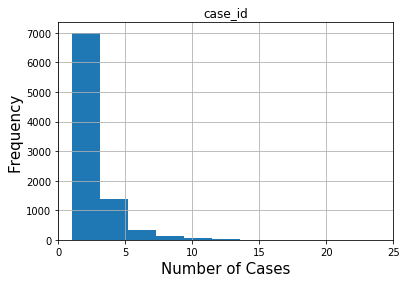

In [15]:
%matplotlib inline  
fig = plt.figure(figsize=(15,10))
pt_case_dist.hist(column="case_id")
plt.xlabel("Number of Cases", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xlim([0.0,25.0])
plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022150A34358>]], dtype=object)

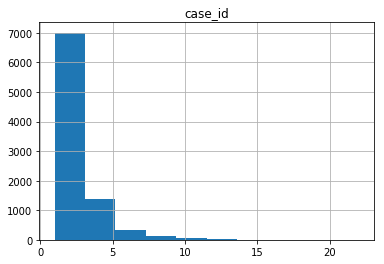

In [16]:
pt_case_dist.hist(column = "case_id")

In [17]:
(pt_case_dist['event_id'] <= 5).sum()

8381

In [18]:
pt_case_dist['event_id'].sum()

22058

In [19]:
tmt.groupby(['patient_id'])['reported'].count()
tmt['date_reported'] = pd.to_datetime(tmt['reported'], infer_datetime_format = True)

C:\Users\sudha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
tmt['month'] = tmt['date_reported'].dt.month
def get_disease(row):
    if row['treat_for_malaria'] == True:
        return 'Malaria'
    if row['treat_for_diarrhea'] == True:
        return 'Diarrhea'
    if row['treat_for_ari'] == True:
        return 'ari'
    else:
        return 'None'
    

tmt['disease'] = tmt.apply(lambda row: get_disease(row), axis=1)
#tmt['month']

C:\Users\sudha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sudha\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [21]:
tmt_in_month = tmt.groupby(['month', 'patient_id', 'follow_up_type'])['date_reported'].count() 

In [22]:
tmt[tmt['patient_id'] == '0da916df-49b9-43b8-a65b-f323a58ea164']

,case_id,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,task_to_perform,treat_for_diarrhea,treat_for_malaria,...,new_danger_sign,close_out,why_close_out,when_child_died,where_child_died,follow_up_count,follow_up_type,date_reported,month,disease
14764,A1810BAF-7465-2F53-965F-9A1B3A2AF756,1,1B19E01F-CB6E-1B34-B5A4-443D0871F34A,4f2fa18f-9f9f-4c91-b08a-17a9911c2221,fdeaf5d5-9518-4511-9f14-007afe72f0d1,0da916df-49b9-43b8-a65b-f323a58ea164,2017-03-17 11:54:06+00,follow_up,False,True,...,no,False,NaN,NaN,NaN,1,malaria,2017-03-17 11:54:06,3,Malaria
14765,A1810BAF-7465-2F53-965F-9A1B3A2AF756,2,5620F971-B311-53F7-A8BA-FB235B1CB0B0,4f2fa18f-9f9f-4c91-b08a-17a9911c2221,fdeaf5d5-9518-4511-9f14-007afe72f0d1,0da916df-49b9-43b8-a65b-f323a58ea164,2017-03-20 10:07:22+00,follow_up,False,True,...,yes,False,NaN,NaN,NaN,2,referral,2017-03-20 10:07:22,3,Malaria
20206,DB83ACB5-A481-4866-AC52-F5EB4C48AAE1,1,90A3162F-308B-8D1B-BB54-7B9E509FBBF1,4f2fa18f-9f9f-4c91-b08a-17a9911c2221,fdeaf5d5-9518-4511-9f14-007afe72f0d1,0da916df-49b9-43b8-a65b-f323a58ea164,2017-12-14 12:19:32+00,follow_up,False,False,...,no,False,NaN,NaN,NaN,1,ari,2017-12-14 12:19:32,12,ari
20207,DB83ACB5-A481-4866-AC52-F5EB4C48AAE1,2,BE686B5F-8962-2565-A7B3-B562734403C7,4f2fa18f-9f9f-4c91-b08a-17a9911c2221,fdeaf5d5-9518-4511-9f14-007afe72f0d1,0da916df-49b9-43b8-a65b-f323a58ea164,2017-12-15 13:06:52+00,follow_up,False,False,...,no,False,NaN,NaN,NaN,2,ari,2017-12-15 13:06:52,12,ari
20208,DB83ACB5-A481-4866-AC52-F5EB4C48AAE1,3,4973783F-9664-74B1-8466-8EADB5C2ADCA,4f2fa18f-9f9f-4c91-b08a-17a9911c2221,fdeaf5d5-9518-4511-9f14-007afe72f0d1,0da916df-49b9-43b8-a65b-f323a58ea164,2017-12-16 15:04:32+00,follow_up,False,False,...,no,False,NaN,NaN,NaN,3,ari,2017-12-16 15:04:32,12,ari
20209,DB83ACB5-A481-4866-AC52-F5EB4C48AAE1,4,444DEDAE-E947-8E92-BA96-D620B6C591B1,4f2fa18f-9f9f-4c91-b08a-17a9911c2221,fdeaf5d5-9518-4511-9f14-007afe72f0d1,0da916df-49b9-43b8-a65b-f323a58ea164,2017-12-18 12:29:53+00,follow_up,False,False,...,no,False,NaN,NaN,NaN,4,ari,2017-12-18 12:29:53,12,ari


In [23]:
tmt_in_month.head()

month  patient_id                            follow_up_type
1      002474b9-b444-481a-beed-eeba61a17cc9  ari               1
       00694a4d-52ae-488a-bbf8-016173ffbd4a  referral          1
       007112cb-6ec1-4e69-9a12-50b1e9482cee  ari               3
       0071C1B3-16C0-864C-A9B5-F0B48CE3666D  ari               3
       0086AEBD-27AE-EFFE-BEAD-A62ADE96416A  ari               2
Name: date_reported, dtype: int64

In [24]:
tmt_in_month.to_csv('treatment_in_month_timeframe.csv')

In [25]:
tmt.groupby(['month', 'disease']).agg(("event_id"))

In [26]:
grouped = tmt.groupby(['patient_id', 'disease']).agg({"date_reported": [min, max]})

In [27]:
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]
#grouped.sort_values(by=['patient_id'])
grouped.head()

,,date_reported_min,date_reported_max
patient_id,disease,,
0017213b-948d-4412-a045-dd0f96ca597a,Malaria,2017-03-04 20:07:07,2017-03-29 12:26:03
00191d38-092f-4535-8645-e945fdbba710,ari,2017-03-03 18:59:54,2017-03-03 18:59:54
002474b9-b444-481a-beed-eeba61a17cc9,ari,2018-01-24 09:59:37,2018-01-24 09:59:37
003121a6-dd2b-40bc-a0a8-4ae3ac6d61cb,ari,2017-04-23 20:35:48,2017-04-27 17:44:32
003BA405-4DDC-1187-86AE-5AF6A9D4E838,ari,2017-10-30 16:42:42,2017-11-02 07:47:23


In [28]:
def first_second(df):
    return df.ix[[0, -1]]

#grouped2 = tmt.groupby(['patient_id', 'disease']).agg({"date_reported": [min, max, 'first', 'last']})
grouped2 = tmt.groupby(['patient_id', 'disease'], as_index=False).agg({"date_reported": [min, max, 'first', 'last']})

#grouped2 = tmt.groupby(['patient_id']).apply(first_second(tmt))
grouped2.head()

patient_id  disease       date_reported  \
                                                                 min   
0  0017213b-948d-4412-a045-dd0f96ca597a  Malaria 2017-03-04 20:07:07   
1  00191d38-092f-4535-8645-e945fdbba710      ari 2017-03-03 18:59:54   
2  002474b9-b444-481a-beed-eeba61a17cc9      ari 2018-01-24 09:59:37   
3  003121a6-dd2b-40bc-a0a8-4ae3ac6d61cb      ari 2017-04-23 20:35:48   
4  003BA405-4DDC-1187-86AE-5AF6A9D4E838      ari 2017-10-30 16:42:42   

                                                               
                  max               first                last  
0 2017-03-29 12:26:03 2017-03-04 20:07:07 2017-03-29 12:26:03  
1 2017-03-03 18:59:54 2017-03-03 18:59:54 2017-03-03 18:59:54  
2 2018-01-24 09:59:37 2018-01-24 09:59:37 2018-01-24 09:59:37  
3 2017-04-27 17:44:32 2017-04-23 20:35:48 2017-04-27 17:44:32  
4 2017-11-02 07:47:23 2017-10-30 16:42:42 2017-11-02 07:47:23

In [29]:
grouped2.columns.values

array([('patient_id', ''), ('disease', ''), ('date_reported', 'min'),
       ('date_reported', 'max'), ('date_reported', 'first'),
       ('date_reported', 'last')], dtype=object)

In [30]:
grouped2.columns = ["_".join(x) for x in grouped2.columns.ravel()]
grouped2.rename(columns={'patient_id_' : 'patient_id', 'disease_' : 'disease'}, inplace=True)
grouped2.sort_values(['patient_id', 'disease'], ascending=[True, True])
new = grouped2.head(20)

In [31]:
list(new.columns.values)

['patient_id',
 'disease',
 'date_reported_min',
 'date_reported_max',
 'date_reported_first',
 'date_reported_last']

In [32]:
new

,patient_id,disease,date_reported_min,date_reported_max,date_reported_first,date_reported_last
0,0017213b-948d-4412-a045-dd0f96ca597a,Malaria,2017-03-04 20:07:07,2017-03-29 12:26:03,2017-03-04 20:07:07,2017-03-29 12:26:03
1,00191d38-092f-4535-8645-e945fdbba710,ari,2017-03-03 18:59:54,2017-03-03 18:59:54,2017-03-03 18:59:54,2017-03-03 18:59:54
2,002474b9-b444-481a-beed-eeba61a17cc9,ari,2018-01-24 09:59:37,2018-01-24 09:59:37,2018-01-24 09:59:37,2018-01-24 09:59:37
3,003121a6-dd2b-40bc-a0a8-4ae3ac6d61cb,ari,2017-04-23 20:35:48,2017-04-27 17:44:32,2017-04-23 20:35:48,2017-04-27 17:44:32
4,003BA405-4DDC-1187-86AE-5AF6A9D4E838,ari,2017-10-30 16:42:42,2017-11-02 07:47:23,2017-10-30 16:42:42,2017-11-02 07:47:23
5,004A8C5C-7FF0-8001-9660-C44FC09EE1B1,Diarrhea,2017-11-23 19:26:54,2017-11-23 19:26:54,2017-11-23 19:26:54,2017-11-23 19:26:54
6,004A8C5C-7FF0-8001-9660-C44FC09EE1B1,ari,2017-04-17 00:48:32,2017-04-20 09:55:19,2017-04-17 00:48:32,2017-04-20 09:55:19
7,00694a4d-52ae-488a-bbf8-016173ffbd4a,Diarrhea,2017-05-16 10:55:18,2018-01-13 12:17:17,2017-05-16 10:55:18,2017-12-13 19:21:37
8,00694a4d-52ae-488a-bbf8-016173ffbd4a,ari,2017-03-09 08:30:02,2017-07-16 14:28:56,2017-03-09 08:30:02,2017-07-16 14:28:56
9,006d300a-ed53-4ebc-b1c0-9180f356edd2,Diarrhea,2017-07-10 10:56:28,2018-02-06 16:03:36,2018-02-06 16:03:36,2017-07-10 10:56:28


In [33]:
grouped2['num_days'] = abs((grouped2.date_reported_last - grouped2.date_reported_first).dt.days)


In [34]:
grouped2.head(20)

,patient_id,disease,date_reported_min,date_reported_max,date_reported_first,date_reported_last,num_days
0,0017213b-948d-4412-a045-dd0f96ca597a,Malaria,2017-03-04 20:07:07,2017-03-29 12:26:03,2017-03-04 20:07:07,2017-03-29 12:26:03,24
1,00191d38-092f-4535-8645-e945fdbba710,ari,2017-03-03 18:59:54,2017-03-03 18:59:54,2017-03-03 18:59:54,2017-03-03 18:59:54,0
2,002474b9-b444-481a-beed-eeba61a17cc9,ari,2018-01-24 09:59:37,2018-01-24 09:59:37,2018-01-24 09:59:37,2018-01-24 09:59:37,0
3,003121a6-dd2b-40bc-a0a8-4ae3ac6d61cb,ari,2017-04-23 20:35:48,2017-04-27 17:44:32,2017-04-23 20:35:48,2017-04-27 17:44:32,3
4,003BA405-4DDC-1187-86AE-5AF6A9D4E838,ari,2017-10-30 16:42:42,2017-11-02 07:47:23,2017-10-30 16:42:42,2017-11-02 07:47:23,2
5,004A8C5C-7FF0-8001-9660-C44FC09EE1B1,Diarrhea,2017-11-23 19:26:54,2017-11-23 19:26:54,2017-11-23 19:26:54,2017-11-23 19:26:54,0
6,004A8C5C-7FF0-8001-9660-C44FC09EE1B1,ari,2017-04-17 00:48:32,2017-04-20 09:55:19,2017-04-17 00:48:32,2017-04-20 09:55:19,3
7,00694a4d-52ae-488a-bbf8-016173ffbd4a,Diarrhea,2017-05-16 10:55:18,2018-01-13 12:17:17,2017-05-16 10:55:18,2017-12-13 19:21:37,211
8,00694a4d-52ae-488a-bbf8-016173ffbd4a,ari,2017-03-09 08:30:02,2017-07-16 14:28:56,2017-03-09 08:30:02,2017-07-16 14:28:56,129
9,006d300a-ed53-4ebc-b1c0-9180f356edd2,Diarrhea,2017-07-10 10:56:28,2018-02-06 16:03:36,2018-02-06 16:03:36,2017-07-10 10:56:28,212


In [35]:
#grouped2.to_csv('Patient_Multiple_Cases_Span.csv')

In [37]:
grouped2.to_excel('Datasets/Patient_Multiple_Cases_Span.xlsx')